# Install All Required Libraries (Windows 11)
Jalankan sel ini sebelum menjalankan notebook untuk memastikan semua library yang dibutuhkan sudah terpasang.

# **Crawling Data**

In [1]:
#@title Twitter Auth Token

#twitter_auth_token = '#ubah dengan auth token' # change this auth token'
twitter_auth_token = '7cbdbe8f96e2832bb515c78c88ed2d13c8e5e059' # change this auth token

In [2]:
import os
import subprocess

# Import required Python package
!pip install pandas numpy nltk sastrawi swifter openpyxl xlrd vaderSentiment scikit-learn matplotlib seaborn wordcloud pytz

# For Windows 11, we'll use the npm package manager that comes with Node.js
# You should install Node.js manually from https://nodejs.org/ if not already installed
# The following command will check if Node.js is installed


# Check if Node.js is installed
try:
    node_version = subprocess.check_output("node -v", shell=True).decode().strip()
    print(f"Node.js is installed with version: {node_version}")
except:
    print("Node.js is not installed. Please install from https://nodejs.org/")
    print("After installation, restart this notebook or your kernel")

# Check if npm is installed
try:
    npm_version = subprocess.check_output("npm -v", shell=True).decode().strip()
    print(f"npm is installed with version: {npm_version}")
except:
    print("npm is not installed. It should come with Node.js installation.")

# We'll install tweet-harvest globally using npm when Node.js is confirmed installed
# This step will be executed only if Node.js is detected
if 'node_version' in locals():
    print("Ready to install tweet-harvest when needed in the crawling cell")

Node.js is installed with version: v22.15.0
npm is installed with version: 11.0.0
Ready to install tweet-harvest when needed in the crawling cell
npm is installed with version: 11.0.0
Ready to install tweet-harvest when needed in the crawling cell


In [3]:
# Crawl Data

filename = 'etikaAI.csv'
search_keyword = 'etika ai since:2025-01-01 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

^C


In [4]:
import pandas as pd

# Specify the path to your CSV file
#file_path = f"tweets-data/{filename}"


# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path, delimiter=",")
df = pd.read_csv("tweets-data/etikaAI.csv", delimiter=",")

# Display the DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1923900123882586560,Sun May 18 00:35:08 +0000 2025,0,Kenapa AI hrus ditekankan etika penggunaannya?...,1923900123882586560,NaN,NaN,in,NaN,0,0,0,https://x.com/retardeus/status/192390012388258...,273549006,retardeus
1,1923790443034116494,Sat May 17 17:19:18 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923790443034116494,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192379044303411...,1627580091034406912,AsistenAI
2,1923645506359533575,Sat May 17 07:43:22 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923645506359533575,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192364550635953...,1627580091034406912,AsistenAI
3,1923603672044535931,Sat May 17 04:57:08 +0000 2025,0,Komdigi minta Dewan Pers tingkatkan etika jurn...,1923603672044535931,https://pbs.twimg.com/media/GrIDRsaXcAApt4l.jpg,NaN,in,NaN,0,0,0,https://x.com/MPN_Indonesia/status/19236036720...,483100064,MPN_Indonesia
4,1923356170623889673,Fri May 16 12:45:44 +0000 2025,0,@adieumeteur Oke ka Yuji paham kok maksudnya. ...,1923359209808138446,NaN,adieumeteur,in,NaN,0,1,0,https://x.com/itsjdpp/status/1923359209808138446,1279322729959710722,itsjdpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1902525975398953348,Thu Mar 20 02:31:07 +0000 2025,0,@bengkeldodo Emng rada stress dan idiot sih pe...,1902548425834688970,NaN,bengkeldodo,in,NaN,0,0,0,https://x.com/NanoNona1963603/status/190254842...,1710873063087374336,NanoNona1963603
842,1902469716880331016,Wed Mar 19 21:18:21 +0000 2025,63,they just simply gak tahu etika penggunaan AI ...,1902469716880331016,https://pbs.twimg.com/media/GmbuH_AagAAGsgk.jpg,NaN,in,NaN,1,2,37,https://x.com/shuakatto/status/190246971688033...,1466444166066589712,shuakatto
843,1902355427633066057,Wed Mar 19 13:44:12 +0000 2025,0,ini gua belajar apa ya buat uts etika ai besok,1902355427633066057,NaN,NaN,in,NaN,0,0,0,https://x.com/gs_tudy/status/1902355427633066057,1581445256276770816,gs_tudy
844,1902271766514597977,Wed Mar 19 08:11:48 +0000 2025,0,etika dalam pemanfaatannya. Perubahan memang t...,1902271774454378993,NaN,alineadotid,in,NaN,0,1,0,https://x.com/alineadotid/status/1902271774454...,354168059,alineadotid


In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 412.


## **PREPROCESSING**

In [ ]:
#import nltk digunakan untuk mengimpor modul NLTK (Natural Language Toolkit) ke dalam program Python
#nltk.download('punkt') digunakan untuk mengunduh data yang diperlukan oleh tokenisasi Punkt dari NLTK.
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Aristo
[nltk_data]     Baadi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Aristo
[nltk_data]     Baadi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Aristo
[nltk_data]     Baadi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
# adalah dua fungsi yang diimpor dari modul NLTK (Natural Language Toolkit) dalam Python
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace("\\","")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

# Make sure df is created by importing it from the same file used in cell 5
import pandas as pd
df = pd.read_csv("tweets-data/etikaAI.csv", delimiter=",")

df['full_text_Tokenizing'] = df['full_text'].apply(remove_tweet_special)
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_Tokenizing
0,1923900123882586560,Sun May 18 00:35:08 +0000 2025,0,Kenapa AI hrus ditekankan etika penggunaannya?...,1923900123882586560,NaN,NaN,in,NaN,0,0,0,https://x.com/retardeus/status/192390012388258...,273549006,retardeus,Kenapa AI hrus ditekankan etika penggunaannya?...
1,1923790443034116494,Sat May 17 17:19:18 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923790443034116494,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192379044303411...,1627580091034406912,AsistenAI,Beberapa pihak telah menemukan cara yang lebih...
2,1923645506359533575,Sat May 17 07:43:22 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923645506359533575,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192364550635953...,1627580091034406912,AsistenAI,Beberapa pihak telah menemukan cara yang lebih...
3,1923603672044535931,Sat May 17 04:57:08 +0000 2025,0,Komdigi minta Dewan Pers tingkatkan etika jurn...,1923603672044535931,https://pbs.twimg.com/media/GrIDRsaXcAApt4l.jpg,NaN,in,NaN,0,0,0,https://x.com/MPN_Indonesia/status/19236036720...,483100064,MPN_Indonesia,Komdigi minta Dewan Pers tingkatkan etika jurn...
4,1923356170623889673,Fri May 16 12:45:44 +0000 2025,0,@adieumeteur Oke ka Yuji paham kok maksudnya. ...,1923359209808138446,NaN,adieumeteur,in,NaN,0,1,0,https://x.com/itsjdpp/status/1923359209808138446,1279322729959710722,itsjdpp,Oke ka Yuji paham kok maksudnya. emang AI puny...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1913078605669892377,Sat Apr 19 07:15:27 +0000 2025,0,@id_lgk Permasalahan besar AI itu kalau udah m...,1913491618168185276,NaN,id_lgk,in,NaN,0,1,0,https://x.com/k0wachii/status/1913491618168185276,2989273564,k0wachii,_lgk Permasalahan besar AI itu kalau udah masu...
408,1913464231024054365,Sat Apr 19 05:26:37 +0000 2025,1,Videonya udah ditakedown ternyata pas aku cek ...,1913464231024054365,NaN,NaN,in,NaN,0,0,0,https://x.com/HughJac19/status/191346423102405...,1280466434544435200,HughJac19,Videonya udah ditakedown ternyata pas aku cek ...
409,1913460535179514293,Sat Apr 19 05:17:55 +0000 2025,0,admin sebuah akun aja gabisa ngerti etika peng...,1913462039072170045,NaN,lekafysre,in,NaN,0,0,0,https://x.com/lekafysre/status/191346203907217...,1446452551210049537,lekafysre,admin sebuah akun aja gabisa ngerti etika peng...
410,1913459345775575141,Sat Apr 19 05:07:13 +0000 2025,1,Problem mengenai AI dalam art itu masalah cons...,1913459345775575141,NaN,NaN,in,NaN,0,0,0,https://x.com/bil___gem/status/191345934577557...,473792339,bil___gem,Problem mengenai AI dalam art itu masalah cons...


# **CASE FOLDING**

In [6]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
#untuk mengubah semua karakter dalam setiap elemen di dalam kolom (Series) menjadi huruf kecil (lowercase).
if 'full_text_Tokenizing' in df.columns:
	df['full_text_Case_Folding'] = df['full_text_Tokenizing'].str.lower()
else:
	df['full_text_Case_Folding'] = df['full_text'].str.lower()


print('Case Folding Result : \n')
#print(TWEET_DATA['full_text'].head(5))
print(df['full_text_Case_Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0    kenapa ai hrus ditekankan etika penggunaannya?...
1    #ainews beberapa pihak telah menemukan cara ya...
2    #ainews beberapa pihak telah menemukan cara ya...
3    komdigi minta dewan pers tingkatkan etika jurn...
4    @adieumeteur oke ka yuji paham kok maksudnya. ...
Name: full_text_Case_Folding, dtype: object






In [7]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_Case_Folding
0,1923900123882586560,Sun May 18 00:35:08 +0000 2025,0,Kenapa AI hrus ditekankan etika penggunaannya?...,1923900123882586560,NaN,NaN,in,NaN,0,0,0,https://x.com/retardeus/status/192390012388258...,273549006,retardeus,kenapa ai hrus ditekankan etika penggunaannya?...
1,1923790443034116494,Sat May 17 17:19:18 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923790443034116494,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192379044303411...,1627580091034406912,AsistenAI,#ainews beberapa pihak telah menemukan cara ya...
2,1923645506359533575,Sat May 17 07:43:22 +0000 2025,0,#AInews Beberapa pihak telah menemukan cara ya...,1923645506359533575,NaN,NaN,in,NaN,0,0,0,https://x.com/AsistenAI/status/192364550635953...,1627580091034406912,AsistenAI,#ainews beberapa pihak telah menemukan cara ya...
3,1923603672044535931,Sat May 17 04:57:08 +0000 2025,0,Komdigi minta Dewan Pers tingkatkan etika jurn...,1923603672044535931,https://pbs.twimg.com/media/GrIDRsaXcAApt4l.jpg,NaN,in,NaN,0,0,0,https://x.com/MPN_Indonesia/status/19236036720...,483100064,MPN_Indonesia,komdigi minta dewan pers tingkatkan etika jurn...
4,1923356170623889673,Fri May 16 12:45:44 +0000 2025,0,@adieumeteur Oke ka Yuji paham kok maksudnya. ...,1923359209808138446,NaN,adieumeteur,in,NaN,0,1,0,https://x.com/itsjdpp/status/1923359209808138446,1279322729959710722,itsjdpp,@adieumeteur oke ka yuji paham kok maksudnya. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1902525975398953348,Thu Mar 20 02:31:07 +0000 2025,0,@bengkeldodo Emng rada stress dan idiot sih pe...,1902548425834688970,NaN,bengkeldodo,in,NaN,0,0,0,https://x.com/NanoNona1963603/status/190254842...,1710873063087374336,NanoNona1963603,@bengkeldodo emng rada stress dan idiot sih pe...
842,1902469716880331016,Wed Mar 19 21:18:21 +0000 2025,63,they just simply gak tahu etika penggunaan AI ...,1902469716880331016,https://pbs.twimg.com/media/GmbuH_AagAAGsgk.jpg,NaN,in,NaN,1,2,37,https://x.com/shuakatto/status/190246971688033...,1466444166066589712,shuakatto,they just simply gak tahu etika penggunaan ai ...
843,1902355427633066057,Wed Mar 19 13:44:12 +0000 2025,0,ini gua belajar apa ya buat uts etika ai besok,1902355427633066057,NaN,NaN,in,NaN,0,0,0,https://x.com/gs_tudy/status/1902355427633066057,1581445256276770816,gs_tudy,ini gua belajar apa ya buat uts etika ai besok
844,1902271766514597977,Wed Mar 19 08:11:48 +0000 2025,0,etika dalam pemanfaatannya. Perubahan memang t...,1902271774454378993,NaN,alineadotid,in,NaN,0,1,0,https://x.com/alineadotid/status/1902271774454...,354168059,alineadotid,etika dalam pemanfaatannya. perubahan memang t...


# **CLEANSING**

In [10]:
import re
import string

#remove number
#def remove_number(text):: Ini adalah definisi fungsi yang disebut remove_number. Fungsi ini memiliki satu parameter yaitu text, yang merupakan teks yang akan diproses.
#return re.sub(r"\d+", "", text): Pada baris ini, fungsi re.sub() digunakan untuk mengganti setiap angka dalam teks dengan string kosong (menghapus angka).
# Baris terakhir menerapkan fungsi remove_number ke setiap elemen dalam kolom
# 'full_text' dalam objek DataFrame TWEET_DATA. Fungsi apply() digunakan untuk
# menerapkan fungsi ke setiap elemen dalam kolom atau baris DataFrame.

def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['full_text_cleansing'] = df['full_text_Case_Folding'].apply(remove_number)


#remove punctuation
#fungsi yang biasanya digunakan dalam pemrosesan teks untuk menghapus tanda baca dari suatu teks.
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['full_text_cleansing'] = df['full_text_cleansing'].apply(remove_punctuation)

# remove whitespace leading & trailing
# fungsi yang digunakan untuk menghapus spasi kosong (whitespace) pada bagian awal (leading) dan akhir (trailing) dari sebuah teks.
def remove_whitespace_LT(text):
    return text.strip()

df['full_text_cleansing'] = df['full_text_cleansing'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
#fungsi yang digunakan untuk mengganti beberapa spasi kosong berturut-turut menjadi satu spasi kosong tunggal dalam sebuah teks.
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['full_text_cleansing'] = df['full_text_cleansing'].apply(remove_whitespace_multiple)

# remove single char
# adalah sebuah fungsi yang digunakan untuk menghapus karakter tunggal (single character) dari sebuah teks.
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['full_text_cleansing'] = df['full_text_cleansing'].apply(remove_singl_char)



# **TOKENIZING**

In [12]:
from nltk.tokenize import word_tokenize

# ------ Tokenizing ---------
# adalah proses memecah teks atau string menjadi unit-unit yang lebih kecil yang disebut dengan token. Token bisa berupa kata-kata, frasa, simbol, karakter, atau unit lainnya tergantung pada tujuan dan konteks pengolahan teks.

# NLTK word rokenize
# ungsi word_tokenize dalam NLTK (Natural Language Toolkit) adalah sebuah fungsi yang digunakan untuk membagi teks menjadi token-token kata individual, yang dikenal sebagai tokenisasi kata (word tokenization).
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['full_text_tokenizing'] = df['full_text_cleansing'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(df['full_text_tokenizing'].head())
print('\n\n\n')

Tokenizing Result : 

0    [kenapa, ai, hrus, ditekankan, etika, pengguna...
1    [ainews, beberapa, pihak, telah, menemukan, ca...
2    [ainews, beberapa, pihak, telah, menemukan, ca...
3    [komdigi, minta, dewan, pers, tingkatkan, etik...
4    [adieumeteur, oke, ka, yuji, paham, kok, maksu...
Name: full_text_tokenizing, dtype: object






In [14]:
from nltk.probability import FreqDist

# NLTK calc frequency distribution
# digunakan untuk menghitung frekuensi distribusi kata dalam sebuah teks. Frekuensi distribusi adalah distribusi statistik yang menunjukkan jumlah kemunculan tiap elemen dalam kumpulan data.
def freqDist_wrapper(text):
    return FreqDist(text)

df['full_text_tokens_fdist'] = df['full_text_tokenizing'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(df['full_text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(ai, 3), (ilmuwan, 2), (masih, 2), (science, ...
1    [(yang, 3), (ai, 2), (ainews, 1), (beberapa, 1...
2    [(yang, 2), (ai, 2), (ainews, 1), (beberapa, 1...
3    [(dan, 3), (komdigi, 1), (minta, 1), (dewan, 1...
4    [(soal, 2), (buat, 2), (adieumeteur, 1), (oke,...
Name: full_text_tokens_fdist, dtype: object


In [15]:
# import Counter digunakan untuk mengimpor kelas Counter dari modul collections dalam Python.
# Kelas Counter adalah sebuah kelas yang menyediakan fungsionalitas untuk menghitung dan mengelola elemen-elemen yang terdapat dalam suatu iterable (seperti list, string, atau tuple)
# Setelah mengimpor Counter, kita dapat membuat objek Counter yang akan menghitung frekuensi kemunculan tiap elemen dalam iterable.

from collections import Counter

# **STOPWORD REMOVAL**

In [16]:
# digunakan untuk mengimpor modul stopwords dari NLTK (Natural Language Toolkit) dalam Python. Modul stopwords menyediakan daftar kata-kata yang umumnya dianggap sebagai kata-kata "stop words" dalam pemrosesan teks.

from nltk.corpus import stopwords

In [18]:
import nltk
#nltk.download('stopwords') digunakan untuk mengunduh data stop words (kata-kata yang umumnya dianggap sebagai kata-kata "stop words") dari NLTK. Stop words adalah kata-kata umum yang sering muncul dalam teks tetapi cenderung tidak memberikan informasi penting dalam pemrosesan teks, seperti kata-kata seperti "the", "is", "are", dan sebagainya.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aristo
[nltk_data]     Baadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
# kalo mau stopword berarti harus di tokenizing dulu, kalo tidak maka hasilnya beda
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
# adalah istilah yang digunakan untuk menambahkan kata-kata stop words tambahan ke dalam daftar stop words yang sudah ada.
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add more Indonesian stopwords ------------------------------------
# Instead of reading from a file, we'll add more common Indonesian stopwords directly
additional_stopwords = [
    'yang', 'dan', 'di', 'ini', 'itu', 'atau', 'pada', 'jadi', 'saya', 'ke', 'tak', 'dari', 'so', 
    'bisa', 'untuk', 'adalah', 'dalam', 'tidak', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 
    'saat', 'seperti', 'oleh', 'menjadi', 'tersebut', 'ia', 'bahwa', 'sebagai', 'karena', 'kepada', 
    'secara', 'ketika', 'mengenai', 'tentang'
]

# Add these additional stopwords to our list
list_stopwords.extend(additional_stopwords)

# ---------------------------------------------------------------------------------------

# convert list to dictionary
# mengonversi list list_stopwords menjadi set ist_stopwords.
list_stopwords = set(list_stopwords)


#remove stopword pada list token
#Dalam script ini, diasumsikan bahwa list_stopwords sudah didefinisikan sebelumnya. Anda perlu memastikan bahwa list_stopwords berisi kata-kata stop words yang sesuai dengan kebutuhan Anda sebelum menjalankan script ini.
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['full_text_tokens_Stopword'] = df['full_text_tokenizing'].apply(stopwords_removal)


print(df['full_text_tokens_Stopword'].head())

0    [ai, hrus, ditekankan, etika, penggunaannya, a...
1    [ainews, menemukan, halus, menipu, kecerdasan,...
2    [ainews, menemukan, halus, menipu, ai, respons...
3    [komdigi, dewan, pers, tingkatkan, etika, jurn...
4    [adieumeteur, oke, ka, yuji, paham, maksudnya,...
Name: full_text_tokens_Stopword, dtype: object


# **NORMALISASI**

In [22]:
# Normalisasi kata menggunakan file "normalisasi-V1.xlsx" jika tersedia
import os

normalisasi_path = "normalisasi-V1.xlsx"
if os.path.exists(normalisasi_path):
    normalized_word = pd.read_excel(normalisasi_path)

    normalized_word_dict = {}
    for index, row in normalized_word.iterrows():
        if row[0] not in normalized_word_dict:
            normalized_word_dict[row[0]] = row[1]

    def normalized_term(document):
        return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

    df['tweet_normalized'] = df['full_text_tokens_Stopword'].apply(normalized_term)
    print(df['tweet_normalized'].head(10))
else:
    print(f"File '{normalisasi_path}' tidak ditemukan. Normalisasi dilewati.")
    df['tweet_normalized'] = df['full_text_tokens_Stopword']

File 'normalisasi-V1.xlsx' tidak ditemukan. Normalisasi dilewati.


# **STEMMING**
Stemming adalah proses mengubah kata berimbuhan (infleksi atau turunan) menjadi bentuk dasar (stem)-nya. Tujuannya adalah menyederhanakan kata agar kata-kata dengan makna serupa dianggap sama dalam pemrosesan bahasa alami (NLP, seperti analisis sentimen, klasifikasi teks, dll).

In [23]:
# pustaka sastrawi digunakan untuk melakukan stemming pada kata. StemmerFactory digunakan untuk membuat objek stemmer, dan kemudian metode stem() digunakan untuk melakukan stemming pada kata yang diberikan.
%pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Fungsi Swifter dalam Pemrosesan Data
# Swifter adalah library Python yang dirancang untuk mempercepat pemrosesan data dengan memanfaatkan kekuatan multiprocessing.
%pip install swifter

Note: you may need to restart the kernel to use updated packages.


In [25]:
# import Sastrawi package
# mengimpor StemmerFactory dari Sastrawi untuk membuat objek stemmer. Kemudian, kita menggunakan swifter untuk menerapkan fungsi stemming pada kolom 'text' DataFrame menggunakan metode swifter.apply(). Hasil stemming disimpan dalam kolom baru 'stemmed_text'.
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
# menggunakan StemmerFactory dari pustaka Sastrawi untuk membuat objek stemmer. Kemudian, menggunakan metode stem() dari objek stemmer, kita melakukan stemming pada kata 'berjalan'. Hasil stemming akan dicetak, yaitu kata 'jalan'.
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# stemmed
#stemmed_wrapper() adalah fungsi yang memanfaatkan objek stemmer untuk melakukan stemming pada setiap term. Kemudian, Anda melakukan iterasi pada term_dict dan menerapkan fungsi stemmed_wrapper()
# --pada setiap term untuk mendapatkan hasil stemming, yang kemudian disimpan kembali dalam term_dict. Terakhir, Anda mencetak term_dict yang berisi term-term yang telah distem.
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
# menggunakan swifter untuk mempercepat proses pemrosesan pada kolom 'tweet_normalized' dan menerapkan fungsi get_stemmed_term() pada setiap dokumen dalam kolom tersebut. Fungsi get_stemmed_term()
# --mengembalikan daftar term yang telah distem berdasarkan nilai yang ada dalam term_dict.
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['tweet_normalized'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

5709
------------------------
ai : ai
hrus : hrus
ditekankan : tekan
etika : etika
penggunaannya : guna
lahir : lahir
lingkup : lingkup
ilmuwan : ilmuwan
dlm : dlm
tahap : tahap
ujicoba : ujicoba
failsafe : failsafe
mah : mah
bingung : bingung
paham : paham
emg : emg
science : science
isnt : isnt
excatly : excatly
an : an
exact : exact
but : but
still : still
ainews : ainews
menemukan : temu
halus : halus
menipu : tipu
kecerdasan : cerdas
buatan : buat
respons : respons
bermasalah : masalah
tantangan : tantang
berkembang : kembang
keamanan : aman
penggunaan : guna
asistenai : asistenai
teknologi : teknologi
komdigi : komdigi
dewan : dewan
pers : pers
tingkatkan : tingkat
jurnalistik : jurnalistik
jaga : jaga
kualitas : kualitas
informasi : informasi
era : era
digital : digital
lindungi : lindung
independensi : independensi
media : media
demokrasi : demokrasi
simak : simak
selengkapnya : lengkap
httpstcoqbewaz : httpstcoqbewaz
httpstcokzlmp : httpstcokzlmp
adieumeteur : adieumeteur
oke 

KeyboardInterrupt: 

In [ ]:
df.to_csv("Hasil-Akhir-Preprocessing(Setelah Stemming).csv")

In [ ]:
# # menginstal pustaka openpyxl. Pustaka ini merupakan salah satu pustaka populer untuk membaca dan menulis file berformat Excel (XLSX) menggunakan Python.
!pip install openpyxl

In [ ]:
# menginstal pustaka xlrd. Pustaka ini digunakan untuk membaca file berformat Excel (XLS) menggunakan Python.
!pip install xlrd

In [ ]:
!pip install nltk

In [ ]:
from nltk.tokenize import sent_tokenize


In [ ]:
df["tweet_tokens_stemmed"]

,tweet_tokens_stemmed
0,"[bencana, alam, terorisme]"
1,"[bencana, alam, terorisme]"
2,"[bencana, alam, layan, sosial, pmi, hadir, vis..."
3,"[termul, bencana, alam, henti, bodoh, sadar, i..."
4,"[anisa, heran, jepang, udah, aware, bencana, a..."
...,...
303,"[brimob, papua, stakeholder, kait, hadir, duka..."
304,"[soal, serious, macamni, insurans, cover, nak,..."
305,"[ngasih, hs, wajib, istri, udah, dinikahin, hu..."
306,"[dibayangin, beneran, bencana, alam, iya, mah]"


In [ ]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,full_text_Tokenizing,full_text_Case_Folding,full_text_cleansing,full_text_tokenizing,full_text_tokens_fdist,full_text_tokens_Stopword,tweet_normalized,tweet_tokens_stemmed
0,1921532145937305872,Sun May 11 11:45:38 +0000 2025,0,Bencana alam dan terorisme https://t.co/A0GRsa...,1921532145937305872,NaN,NaN,in,NaN,0,...,1355371226433114112,RonnySe42184729,Bencana alam dan terorisme,bencana alam dan terorisme,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]"
1,1921531237748891681,Sun May 11 11:42:02 +0000 2025,0,Bencana alam dan terorisme..... #indonesia,1921531237748891681,NaN,NaN,in,NaN,0,...,1355371226433114112,RonnySe42184729,Bencana alam dan terorisme.....,bencana alam dan terorisme.....,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]"
2,1921529820682363375,Sun May 11 11:36:25 +0000 2025,0,Dari bencana alam hingga pelayanan sosial PMI ...,1921529825950388325,NaN,PMI_Surabaya,in,Surabaya Indonesia,0,...,124763946,PMI_Surabaya,Dari bencana alam hingga pelayanan sosial PMI ...,dari bencana alam hingga pelayanan sosial pmi ...,dari bencana alam hingga pelayanan sosial pmi ...,"[dari, bencana, alam, hingga, pelayanan, sosia...","{'dari': 1, 'bencana': 1, 'alam': 1, 'hingga':...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, layan, sosial, pmi, hadir, vis..."
3,1921367948012183642,Sun May 11 11:26:59 +0000 2025,0,@yaniarsim Bagi termul hanya bencana alam yg b...,1921527452179779746,NaN,yaniarsim,in,ありがとう,0,...,1517232624,Malao_Ngeluh,Bagi termul hanya bencana alam yg bisa menghen...,bagi termul hanya bencana alam yg bisa menghen...,bagi termul hanya bencana alam yg bisa menghen...,"[bagi, termul, hanya, bencana, alam, yg, bisa,...","{'bagi': 1, 'termul': 1, 'hanya': 1, 'bencana'...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, henti, bodoh, sadar, i..."
4,1921450099953045573,Sun May 11 11:10:22 +0000 2025,1,@lxloymble @Pengantarcerita @hafizha_anisa ya ...,1921523269028499575,NaN,lxloymble,in,don't screenshot my post.,0,...,1303295390020583424,kitticos,_anisa ya ga heran sih jepang udah aware sama ...,_anisa ya ga heran sih jepang udah aware sama ...,anisa ya ga heran sih jepang udah aware sama b...,"[anisa, ya, ga, heran, sih, jepang, udah, awar...","{'anisa': 1, 'ya': 1, 'ga': 2, 'heran': 1, 'si...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1918203495473430871,Fri May 02 07:18:46 +0000 2025,3,Brimob Papua dan Stakeholder terkait hadir di ...,1918203495473430871,https://pbs.twimg.com/media/Gp7T3OjawAMe7mw.jpg,NaN,in,"Depok, Indonesia",0,...,958188936752381952,humaskorbrimob,Brimob Papua dan Stakeholder terkait hadir di ...,brimob papua dan stakeholder terkait hadir di ...,brimob papua dan stakeholder terkait hadir di ...,"[brimob, papua, dan, stakeholder, terkait, had...","{'brimob': 2, 'papua': 1, 'dan': 1, 'stakehold...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, kait, hadir, duka..."
304,1917552132942881277,Fri May 02 07:04:36 +0000 2025,0,@meinmokhtar soalan serious. kalau macamni ins...,1918199928385593662,NaN,meinmokhtar,in,kepulauan,0,...,1124424658286141440,elpicassohombre,soalan serious. kalau macamni insurans cover k...,soalan seriou

# **Menggabungkan Kalimat Hasil Tokenizing**

In [ ]:
df['kalimat_tanpa_kurung'] = df['tweet_tokens_stemmed'].apply(lambda x: ' '.join(x))

In [ ]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,username,full_text_Tokenizing,full_text_Case_Folding,full_text_cleansing,full_text_tokenizing,full_text_tokens_fdist,full_text_tokens_Stopword,tweet_normalized,tweet_tokens_stemmed,kalimat_tanpa_kurung
0,1921532145937305872,Sun May 11 11:45:38 +0000 2025,0,Bencana alam dan terorisme https://t.co/A0GRsa...,1921532145937305872,NaN,NaN,in,NaN,0,...,RonnySe42184729,Bencana alam dan terorisme,bencana alam dan terorisme,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme
1,1921531237748891681,Sun May 11 11:42:02 +0000 2025,0,Bencana alam dan terorisme..... #indonesia,1921531237748891681,NaN,NaN,in,NaN,0,...,RonnySe42184729,Bencana alam dan terorisme.....,bencana alam dan terorisme.....,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme
2,1921529820682363375,Sun May 11 11:36:25 +0000 2025,0,Dari bencana alam hingga pelayanan sosial PMI ...,1921529825950388325,NaN,PMI_Surabaya,in,Surabaya Indonesia,0,...,PMI_Surabaya,Dari bencana alam hingga pelayanan sosial PMI ...,dari bencana alam hingga pelayanan sosial pmi ...,dari bencana alam hingga pelayanan sosial pmi ...,"[dari, bencana, alam, hingga, pelayanan, sosia...","{'dari': 1, 'bencana': 1, 'alam': 1, 'hingga':...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, layan, sosial, pmi, hadir, vis...",bencana alam layan sosial pmi hadir visi misi ...
3,1921367948012183642,Sun May 11 11:26:59 +0000 2025,0,@yaniarsim Bagi termul hanya bencana alam yg b...,1921527452179779746,NaN,yaniarsim,in,ありがとう,0,...,Malao_Ngeluh,Bagi termul hanya bencana alam yg bisa menghen...,bagi termul hanya bencana alam yg bisa menghen...,bagi termul hanya bencana alam yg bisa menghen...,"[bagi, termul, hanya, bencana, alam, yg, bisa,...","{'bagi': 1, 'termul': 1, 'hanya': 1, 'bencana'...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, henti, bodoh, sadar, i...",termul bencana alam henti bodoh sadar itu seka...
4,1921450099953045573,Sun May 11 11:10:22 +0000 2025,1,@lxloymble @Pengantarcerita @hafizha_anisa ya ...,1921523269028499575,NaN,lxloymble,in,don't screenshot my post.,0,...,kitticos,_anisa ya ga heran sih jepang udah aware sama ...,_anisa ya ga heran sih jepang udah aware sama ...,anisa ya ga heran sih jepang udah aware sama b...,"[anisa, ya, ga, heran, sih, jepang, udah, awar...","{'anisa': 1, 'ya': 1, 'ga': 2, 'heran': 1, 'si...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...",anisa heran jepang udah aware bencana alam ora...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1918203495473430871,Fri May 02 07:18:46 +0000 2025,3,Brimob Papua dan Stakeholder terkait hadir di ...,1918203495473430871,https://pbs.twimg.com/media/Gp7T3OjawAMe7mw.jpg,NaN,in,"Depok, Indonesia",0,...,humaskorbrimob,Brimob Papua dan Stakeholder terkait hadir di ...,brimob papua dan stakeholder terkait hadir di ...,brimob papua dan stakeholder terkait hadir di ...,"[brimob, papua, dan, stakeholder, terkait, had...","{'brimob': 2, 'papua': 1, 'dan': 1, 'stakehold...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, kait, hadir, duka...",brimob papua stakeholder kait hadir duka benca...
304,1917552132942881277,Fri May 02 07:04:36 +0000 2025,0,@meinmokhtar soalan serious. kalau macamni ins...

In [ ]:
# mengimpor fungsi word_tokenize dari modul nltk.tokenize. Fungsi word_tokenize digunakan untuk membagi teks menjadi token kata-kata.
from nltk.tokenize import word_tokenize

# **Leksikon**

In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install nltk

In [ ]:
!pip install numpy

In [ ]:
!pip install scikit-learn

In [ ]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
import numpy as np

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Create an instance of SentimentIntensityAnalyzer
model = SentimentIntensityAnalyzer()

In [ ]:
def extract_score(text):
  score = model.polarity_scores(text)
  compound = score['compound']
  sentiment = 'neutral'
  if(compound >= 0.05):
    sentiment = "positive"
  elif(compound <= -0.05):
    sentiment = "negative"
  return sentiment

In [ ]:
# What about this sentence with repeated exclamations and capitalization?
# print(model.polarity_scores(user_input))
#extract_score('i hate') - menghasilkan negative
#extract_score('i love') - menghasilkan positive
extract_score('good')

'positive'

In [ ]:
#select columns called 'Text Filtering'
df_new = df['tweet_tokens_stemmed']

#view new DataFrame
df_new

,tweet_tokens_stemmed
0,"[bencana, alam, terorisme]"
1,"[bencana, alam, terorisme]"
2,"[bencana, alam, layan, sosial, pmi, hadir, vis..."
3,"[termul, bencana, alam, henti, bodoh, sadar, i..."
4,"[anisa, heran, jepang, udah, aware, bencana, a..."
...,...
303,"[brimob, papua, stakeholder, kait, hadir, duka..."
304,"[soal, serious, macamni, insurans, cover, nak,..."
305,"[ngasih, hs, wajib, istri, udah, dinikahin, hu..."
306,"[dibayangin, beneran, bencana, alam, iya, mah]"


In [ ]:
import csv
import os
#find file path for lexicon bahasa indonesia
#filepath = '/sembako4.csv'

#create dictionary for positive lexicon
lexicon_positive = {}

#read the positive tsv file
with open(os.path.join('positive.tsv')) as tsv_file:
    reader = csv.reader(tsv_file, delimiter='\t')
    next(reader)
    for word, weight in reader:
        lexicon_positive[word] = int(weight)

#create dictionary for negative lexicon
lexicon_negative = {}

#read the negative tsv file
with open(os.path.join('negative.tsv')) as tsv_file:
    reader = csv.reader(tsv_file, delimiter='\t')
    next(reader)
    for word, weight in reader:
        lexicon_negative[word] = int(weight)

#check the dictionaries
print(lexicon_positive)
print(lexicon_negative)

{'hai': 3, 'merekam': 2, 'ekstensif': 3, 'paripurna': 1, 'detail': 2, 'pernik': 3, 'belas': 2, 'welas': 4, 'kabung': 1, 'rahayu': 4, 'maaf': 2, 'hello': 2, 'promo': 3, 'terimakasih': 5, 'cover': 3, 'mohon': 2, 'mengawal': 2, 'statistik': 1, 'keluangan': 3, 'jalan terbuka': 3, 'banyaknya': 3, 'lebar': 3, 'bentang': 1, 'hendaknya': 1, 'silahkan': 3, 'semboyan': 2, 'ditunggu': 2, 'akses': 2, 'penerangan': 2, 'hi': 1, 'dibantu': 2, 'makasih': 4, 'halo': 1, 'thanks': 3, 'pengembangan': 3, 'diva': 2, 'punya': 3, 'tidak segan': 2, 'detailnya': 1, 'tak segan': 2, 'aktivasi': 2, 'asih': 3, 'kasih sayang': 5, 'kekaguman': 4, 'kehangatan': 4, 'afeksi': 2, 'renjana': 2, 'amor': 2, 'cinta kasih': 5, 'tresna': 2, 'filantropi': 2, 'cintrong': 2, 'suasana (hati)': 1, 'dinamika': 3, 'tuhan': 3, 'merespon': 3, 'makmur': 4, 'suka cita': 4, 'pengguna': 1, 'tunggu': 1, 'lotre': 2, 'nggak': 1, 'kupon': 3, 'terpelihara': 4, 'terawat': 5, 'tersadar': 3, 'tari': 1, 'gejolak': 1, 'kejutan': 3, 'pesta': 4, 'geta

Untuk menambahkan tanda petik (") atau tanda kutip (') ke dalam kolom DataFrame di Python (misalnya di sekitar setiap kata atau kalimat), kamu bisa menggunakan fungsi apply() atau str.replace() atau str.join() tergantung bentuk datanya.

Berikut beberapa contoh umum:

In [ ]:
#select columns called 'Text Filtering'
df['tweet_tokens_stemmed_2'] = df['tweet_tokens_stemmed'].apply(lambda x: f'{x}')

#view new DataFrame
df['tweet_tokens_stemmed_2']

,tweet_tokens_stemmed_2
0,"['bencana', 'alam', 'terorisme']"
1,"['bencana', 'alam', 'terorisme']"
2,"['bencana', 'alam', 'layan', 'sosial', 'pmi', ..."
3,"['termul', 'bencana', 'alam', 'henti', 'bodoh'..."
4,"['anisa', 'heran', 'jepang', 'udah', 'aware', ..."
...,...
303,"['brimob', 'papua', 'stakeholder', 'kait', 'ha..."
304,"['soal', 'serious', 'macamni', 'insurans', 'co..."
305,"['ngasih', 'hs', 'wajib', 'istri', 'udah', 'di..."
306,"['dibayangin', 'beneran', 'bencana', 'alam', '..."


error seperti ini karena data frame tidak ada tanda kutip
cek https://github.com/agushendra7/twitter-sentiment-analysis-using-vader-and-random-forest/blob/main/labeling/vader%20sentiment.ipynb

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()

df['Score'] = df['tweet_tokens_stemmed_2'].apply(lambda x: vs.polarity_scores(x))
df_new['Compound Score'] = df['tweet_tokens_stemmed_2'].apply(lambda x: vs.polarity_scores(x)['compound'])

df_new.head()

<ipython-input-87-6ec8c02d999c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Compound Score'] = df['tweet_tokens_stemmed_2'].apply(lambda x: vs.polarity_scores(x)['compound'])


,tweet_tokens_stemmed
0,"[bencana, alam, terorisme]"
1,"[bencana, alam, terorisme]"
2,"[bencana, alam, layan, sosial, pmi, hadir, vis..."
3,"[termul, bencana, alam, henti, bodoh, sadar, i..."
4,"[anisa, heran, jepang, udah, aware, bencana, a..."


In [ ]:
def vader_analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <=  -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_new['Vader Sentiment'] = df_new['Compound Score'].apply(vader_analysis)
df_new.head(10)

,tweet_tokens_stemmed
0,"[bencana, alam, terorisme]"
1,"[bencana, alam, terorisme]"
2,"[bencana, alam, layan, sosial, pmi, hadir, vis..."
3,"[termul, bencana, alam, henti, bodoh, sadar, i..."
4,"[anisa, heran, jepang, udah, aware, bencana, a..."
5,"[anisa, ajar, tanda, alam, daerah, rawan, benc..."
6,"[andai, ikan, ngomong, blok, gua, kasih, lu, l..."
7,"[moga, bencana, alam, landa]"
8,"[farizi, nunggu, gempa, lakuin, mitigasi, benc..."
9,"[tanggap, praktik, nikah, tinggat, smasmk, gel..."


In [ ]:
vader_counts = df_new['Vader Sentiment'].value_counts()
vader_counts

,count
tweet_tokens_stemmed_2,
Neutral,261
Negative,31
Positive,16


In [ ]:
df['Vader Sentiment'] = df_new['Vader Sentiment']

In [ ]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,full_text_cleansing,full_text_tokenizing,full_text_tokens_fdist,full_text_tokens_Stopword,tweet_normalized,tweet_tokens_stemmed,kalimat_tanpa_kurung,tweet_tokens_stemmed_2,Score,Vader Sentiment
0,1921532145937305872,Sun May 11 11:45:38 +0000 2025,0,Bencana alam dan terorisme https://t.co/A0GRsa...,1921532145937305872,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,1921531237748891681,Sun May 11 11:42:02 +0000 2025,0,Bencana alam dan terorisme..... #indonesia,1921531237748891681,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,1921529820682363375,Sun May 11 11:36:25 +0000 2025,0,Dari bencana alam hingga pelayanan sosial PMI ...,1921529825950388325,NaN,PMI_Surabaya,in,Surabaya Indonesia,0,...,dari bencana alam hingga pelayanan sosial pmi ...,"[dari, bencana, alam, hingga, pelayanan, sosia...","{'dari': 1, 'bencana': 1, 'alam': 1, 'hingga':...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, layan, sosial, pmi, hadir, vis...",bencana alam layan sosial pmi hadir visi misi ...,"['bencana', 'alam', 'layan', 'sosial', 'pmi', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,1921367948012183642,Sun May 11 11:26:59 +0000 2025,0,@yaniarsim Bagi termul hanya bencana alam yg b...,1921527452179779746,NaN,yaniarsim,in,ありがとう,0,...,bagi termul hanya bencana alam yg bisa menghen...,"[bagi, termul, hanya, bencana, alam, yg, bisa,...","{'bagi': 1, 'termul': 1, 'hanya': 1, 'bencana'...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, henti, bodoh, sadar, i...",termul bencana alam henti bodoh sadar itu seka...,"['termul', 'bencana', 'alam', 'henti', 'bodoh'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,1921450099953045573,Sun May 11 11:10:22 +0000 2025,1,@lxloymble @Pengantarcerita @hafizha_anisa ya ...,1921523269028499575,NaN,lxloymble,in,don't screenshot my post.,0,...,anisa ya ga heran sih jepang udah aware sama b...,"[anisa, ya, ga, heran, sih, jepang, udah, awar...","{'anisa': 1, 'ya': 1, 'ga': 2, 'heran': 1, 'si...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...",anisa heran jepang udah aware bencana alam ora...,"['anisa', 'heran', 'jepang', 'udah', 'aware', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1918203495473430871,Fri May 02 07:18:46 +0000 2025,3,Brimob Papua dan Stakeholder terkait hadir di ...,1918203495473430871,https://pbs.twimg.com/media/Gp7T3OjawAMe7mw.jpg,NaN,in,"Depok, Indonesia",0,...,brimob papua dan stakeholder terkait hadir di ...,"[brimob, papua, dan, stakeholder, terkait, had...","{'brimob': 2, 'papua': 1, 'dan': 1, 'stakehold...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, kait, hadir, duka...",brimob papua stakeholder kait hadir duka benca...,"['brimob', 'papua', 'stakeholder', 'kait', 'ha...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
304,1917552132942881277,Fri May 02 07:04:36 +0000 2025,0,@meinmokhtar soalan

In [ ]:
df.to_csv("bencana-alam-sentiment.csv")

# **Disini Untuk Mengetahui Sentimen Hasil**

# **Sampe Sini**

In [ ]:
# Hitung jumlah kata (token) dalam setiap baris (kalimat) pada kolom teks.
# word_tokenize(x) (dari nltk) lebih canggih: mengenali tanda baca dan format bahasa
df["JumlahKata"] = df["full_text_Case_Folding"].apply(lambda x: len(word_tokenize(x)))

In [ ]:
# Memecah setiap baris teks menjadi list kata-kata (token) berdasarkan spasi (split()).
# x.split() hanya memisahkan berdasarkan spasi (tidak hapus tanda baca, dll)
df["full_text_split"] = df["full_text_Case_Folding"].apply(lambda x: len(x.split()))

In [ ]:
# Modul pandas digunakan untuk manipulasi dan analisis data tabular, sedangkan modul Counter digunakan untuk menghitung kemunculan elemen-elemen dalam suatu koleksi.
import pandas as pd
from collections import Counter

# **Menghitung Banyak Kata**

In [ ]:
# Perbaikan: pastikan variabel 'teks' sudah didefinisikan sebelum digunakan
# Contoh inisialisasi:
teks = ' '.join(df['kalimat_tanpa_kurung'].astype(str))
# Memisahkan kata-kata dalam teks
kata_kunci = teks.split()

In [ ]:
# Menghitung jumlah masing-masing kata
jumlah_kata = Counter(kata_kunci)

In [ ]:
# Menampilkan jumlah masing-masing kata
for kata, jumlah in jumlah_kata.items():
    print(f"Kata: {kata}, Jumlah: {jumlah}")

Kata: letus, Jumlah: 8
Kata: gunung, Jumlah: 16
Kata: krakatau, Jumlah: 2
Kata: tanda, Jumlah: 11
Kata: bencana, Jumlah: 567
Kata: alam, Jumlah: 525
Kata: hewan, Jumlah: 4
Kata: ting, Jumlah: 1
Kata: aneh, Jumlah: 3
Kata: peka, Jumlah: 1
Kata: aku, Jumlah: 14
Kata: bingung, Jumlah: 3
Kata: ngakakin, Jumlah: 1
Kata: postingan, Jumlah: 1
Kata: pesbuk, Jumlah: 1
Kata: gakenal, Jumlah: 1
Kata: cewe, Jumlah: 1
Kata: kayak, Jumlah: 26
Kata: tetangga, Jumlah: 1
Kata: desa, Jumlah: 13
Kata: up, Jumlah: 3
Kata: foto, Jumlah: 2
Kata: engagement, Jumlah: 2
Kata: caption, Jumlah: 1
Kata: we, Jumlah: 2
Kata: pray, Jumlah: 2
Kata: for, Jumlah: 2
Kata: tgl, Jumlah: 1
Kata: kaya, Jumlah: 16
Kata: hah, Jumlah: 2
Kata: kek, Jumlah: 13
Kata: kena, Jumlah: 27
Kata: kati, Jumlah: 1
Kata: gitu, Jumlah: 15
Kata: mksdnya, Jumlah: 1
Kata: thailand, Jumlah: 4
Kata: filipina, Jumlah: 2
Kata: milik, Jumlah: 8
Kata: cell, Jumlah: 1
Kata: broadcast, Jumlah: 1
Kata: system, Jumlah: 1
Kata: cbs, Jumlah: 2
Kata: dukun

In [ ]:
# Membuat DataFrame dari hasil perhitungan #BELM DI CEK
df_jumlah_kata = pd.DataFrame(jumlah_kata.items(), columns=["Kata", "Jumlah"])

In [ ]:
# Menampilkan DataFrame
print(df_jumlah_kata)

            Kata  Jumlah
0          letus       8
1         gunung      16
2       krakatau       2
3          tanda      11
4        bencana     567
...          ...     ...
2799  bendabenda       1
2800  elektronik       1
2801        king       1
2802    yonghoon       1
2803    positive       1

[2804 rows x 2 columns]


In [ ]:
df_jumlah_kata.to_csv("hasil_jumlah_kata.csv", index=False)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   conversation_id_str        510 non-null    int64 
 1   created_at                 510 non-null    object
 2   favorite_count             510 non-null    int64 
 3   full_text                  510 non-null    object
 4   id_str                     510 non-null    int64 
 5   image_url                  98 non-null     object
 6   in_reply_to_screen_name    279 non-null    object
 7   lang                       510 non-null    object
 8   location                   313 non-null    object
 9   quote_count                510 non-null    int64 
 10  reply_count                510 non-null    int64 
 11  retweet_count              510 non-null    int64 
 12  tweet_url                  510 non-null    object
 13  user_id_str                510 non-null    int64 
 14  username  

In [ ]:
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,full_text_cleansing,full_text_tokenizing,full_text_tokens_fdist,full_text_tokens_Stopword,tweet_normalized,tweet_tokens_stemmed,kalimat_tanpa_kurung,tweet_tokens_stemmed_2,Score,Vader Sentiment
0,1921532145937305872,Sun May 11 11:45:38 +0000 2025,0,Bencana alam dan terorisme https://t.co/A0GRsa...,1921532145937305872,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,1921531237748891681,Sun May 11 11:42:02 +0000 2025,0,Bencana alam dan terorisme..... #indonesia,1921531237748891681,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,1921529820682363375,Sun May 11 11:36:25 +0000 2025,0,Dari bencana alam hingga pelayanan sosial PMI ...,1921529825950388325,NaN,PMI_Surabaya,in,Surabaya Indonesia,0,...,dari bencana alam hingga pelayanan sosial pmi ...,"[dari, bencana, alam, hingga, pelayanan, sosia...","{'dari': 1, 'bencana': 1, 'alam': 1, 'hingga':...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, layan, sosial, pmi, hadir, vis...",bencana alam layan sosial pmi hadir visi misi ...,"['bencana', 'alam', 'layan', 'sosial', 'pmi', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,1921367948012183642,Sun May 11 11:26:59 +0000 2025,0,@yaniarsim Bagi termul hanya bencana alam yg b...,1921527452179779746,NaN,yaniarsim,in,ありがとう,0,...,bagi termul hanya bencana alam yg bisa menghen...,"[bagi, termul, hanya, bencana, alam, yg, bisa,...","{'bagi': 1, 'termul': 1, 'hanya': 1, 'bencana'...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, henti, bodoh, sadar, i...",termul bencana alam henti bodoh sadar itu seka...,"['termul', 'bencana', 'alam', 'henti', 'bodoh'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,1921450099953045573,Sun May 11 11:10:22 +0000 2025,1,@lxloymble @Pengantarcerita @hafizha_anisa ya ...,1921523269028499575,NaN,lxloymble,in,don't screenshot my post.,0,...,anisa ya ga heran sih jepang udah aware sama b...,"[anisa, ya, ga, heran, sih, jepang, udah, awar...","{'anisa': 1, 'ya': 1, 'ga': 2, 'heran': 1, 'si...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...",anisa heran jepang udah aware bencana alam ora...,"['anisa', 'heran', 'jepang', 'udah', 'aware', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1918203495473430871,Fri May 02 07:18:46 +0000 2025,3,Brimob Papua dan Stakeholder terkait hadir di ...,1918203495473430871,https://pbs.twimg.com/media/Gp7T3OjawAMe7mw.jpg,NaN,in,"Depok, Indonesia",0,...,brimob papua dan stakeholder terkait hadir di ...,"[brimob, papua, dan, stakeholder, terkait, had...","{'brimob': 2, 'papua': 1, 'dan': 1, 'stakehold...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, terkait, hadir, d...","[brimob, papua, stakeholder, kait, hadir, duka...",brimob papua stakeholder kait hadir duka benca...,"['brimob', 'papua', 'stakeholder', 'kait', 'ha...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
304,1917552132942881277,Fri May 02 07:04:36 +0000 2025,0,@meinmokhtar soalan

# **Mengubah Nama Kolom**

In [ ]:
df.rename(columns={'Vader Sentiment': 'label'}, inplace=True)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,full_text_cleansing,full_text_tokenizing,full_text_tokens_fdist,full_text_tokens_Stopword,tweet_normalized,tweet_tokens_stemmed,kalimat_tanpa_kurung,tweet_tokens_stemmed_2,Score,label
0,1921532145937305872,Sun May 11 11:45:38 +0000 2025,0,Bencana alam dan terorisme https://t.co/A0GRsa...,1921532145937305872,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,1921531237748891681,Sun May 11 11:42:02 +0000 2025,0,Bencana alam dan terorisme..... #indonesia,1921531237748891681,NaN,NaN,in,NaN,0,...,bencana alam dan terorisme,"[bencana, alam, dan, terorisme]","{'bencana': 1, 'alam': 1, 'dan': 1, 'terorisme...","[bencana, alam, terorisme]","[bencana, alam, terorisme]","[bencana, alam, terorisme]",bencana alam terorisme,"['bencana', 'alam', 'terorisme']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,1921529820682363375,Sun May 11 11:36:25 +0000 2025,0,Dari bencana alam hingga pelayanan sosial PMI ...,1921529825950388325,NaN,PMI_Surabaya,in,Surabaya Indonesia,0,...,dari bencana alam hingga pelayanan sosial pmi ...,"[dari, bencana, alam, hingga, pelayanan, sosia...","{'dari': 1, 'bencana': 1, 'alam': 1, 'hingga':...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, pelayanan, sosial, pmi, hadir,...","[bencana, alam, layan, sosial, pmi, hadir, vis...",bencana alam layan sosial pmi hadir visi misi ...,"['bencana', 'alam', 'layan', 'sosial', 'pmi', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,1921367948012183642,Sun May 11 11:26:59 +0000 2025,0,@yaniarsim Bagi termul hanya bencana alam yg b...,1921527452179779746,NaN,yaniarsim,in,ありがとう,0,...,bagi termul hanya bencana alam yg bisa menghen...,"[bagi, termul, hanya, bencana, alam, yg, bisa,...","{'bagi': 1, 'termul': 1, 'hanya': 1, 'bencana'...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, menghentikan, kebodoha...","[termul, bencana, alam, henti, bodoh, sadar, i...",termul bencana alam henti bodoh sadar itu seka...,"['termul', 'bencana', 'alam', 'henti', 'bodoh'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,1921450099953045573,Sun May 11 11:10:22 +0000 2025,1,@lxloymble @Pengantarcerita @hafizha_anisa ya ...,1921523269028499575,NaN,lxloymble,in,don't screenshot my post.,0,...,anisa ya ga heran sih jepang udah aware sama b...,"[anisa, ya, ga, heran, sih, jepang, udah, awar...","{'anisa': 1, 'ya': 1, 'ga': 2, 'heran': 1, 'si...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...","[anisa, heran, jepang, udah, aware, bencana, a...",anisa heran jepang udah aware bencana alam ora...,"['anisa', 'heran', 'jepang', 'udah', 'aware', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [ ]:
import numpy as np
import pandas as pd
import nltk
from io import StringIO
import pytz
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import ast
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from nltk.tokenize import SpaceTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
import os
import socket
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
#st.set_option('deprecation.showPyplotGlobalUse', False) #ini dikasih komentar biar ga error
import math
import pprint
from sklearn.svm import LinearSVC #classifier SVM
from sklearn.svm import SVC
# Menginisialisasi Sastrawi Stemmer
from wordcloud import WordCloud
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
"""TF-IDF"""
#Perlu dicari cara untuk membuat Label dengan TF-IDF

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['kalimat_tanpa_kurung'], df['label'], test_size=0.2, random_state=7)

df_train = pd.DataFrame()
df_train['kalimat_tanpa_kurung'] = x_train
df_train['label'] = y_train

df_test= pd.DataFrame()
df_test['kalimat_tanpa_kurung'] = x_test
df_test['label'] = y_test

df_train

df_test

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer
tfidf=TfidfVectorizer()
tfidf.fit(df['kalimat_tanpa_kurung'].values.astype('U'))
#hitung tf-idf setiap kata pada data training
x_train_tfidf = tfidf.transform(df_train['kalimat_tanpa_kurung'].values.astype('U'))
#hitung tf-idf setiap kata pada data testing
x_test_tfidf = tfidf.transform(df_test['kalimat_tanpa_kurung'].values.astype('U'))

df_train.to_csv('tweet-train.csv', index=False)
df_train.to_csv('tweet-test.csv', index=False)

tfidf

print(x_train_tfidf)

print(x_test_tfidf)

print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

print(tfidf.vocabulary_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3358 stored elements and shape (246, 1885)>
  Coords	Values
  (0, 43)	0.047113001404272783
  (0, 93)	0.28091153600293456
  (0, 211)	0.04665779022084535
  (0, 402)	0.28091153600293456
  (0, 498)	0.24867531377867638
  (0, 530)	0.28091153600293456
  (0, 763)	0.2620545548368296
  (0, 904)	0.28091153600293456
  (0, 1031)	0.28091153600293456
  (0, 1062)	0.28091153600293456
  (0, 1171)	0.28091153600293456
  (0, 1226)	0.17155603770701564
  (0, 1281)	0.2382975681716553
  (0, 1320)	0.2620545548368296
  (0, 1442)	0.28091153600293456
  (0, 1775)	0.28091153600293456
  (1, 43)	0.05063975301360674
  (1, 211)	0.05015046595460594
  (1, 238)	0.30193981232049844
  (1, 246)	0.30193981232049844
  (1, 359)	0.30193981232049844
  (1, 649)	0.30193981232049844
  (1, 825)	0.28167124864654014
  (1, 841)	0.28167124864654014
  (1, 888)	0.2561358783408209
  :	:
  (244, 1317)	0.22210477567603726
  (244, 1366)	0.23808704156121846
  (244, 1431)	0.22210477567

In [ ]:
# metode SVM

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics


SVM = SVC(kernel='linear')
SVM.fit(x_train_tfidf,y_train)

SVC(kernel='linear')

The Accuracy is 88.71%
[[ 2  4  0]
 [ 0 53  0]
 [ 0  3  0]]
The classification report is:
              precision    recall  f1-score   support

    Negative       1.00      0.33      0.50         6
     Neutral       0.88      1.00      0.94        53
    Positive       0.00      0.00      0.00         3

    accuracy                           0.89        62
   macro avg       0.63      0.44      0.48        62
weighted avg       0.85      0.89      0.85        62



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


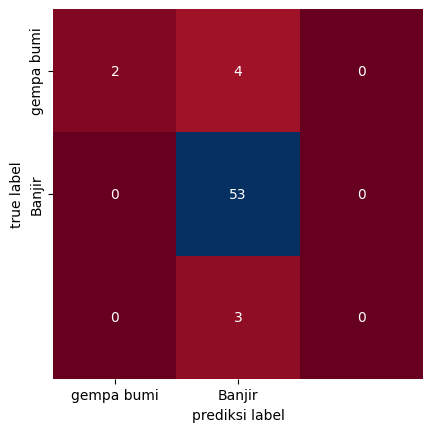

In [ ]:
# data test svm

from sklearn.metrics import accuracy_score

predictions_SVM = SVM.predict(x_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['text'] = x_test
test_prediction['label'] = predictions_SVM
model1 = metrics.accuracy_score(y_test, predictions_SVM)
print("The Accuracy is",str('{:04.2f}'.format(model1*100))+'%')

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, predictions_SVM)
print(matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['gempa bumi','Banjir'], yticklabels= ['gempa bumi','Banjir'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report

print ("The classification report is:")
print (classification_report(y_test, predictions_SVM))

test_prediction

test_prediction.to_csv('testpredict.csv', index=False)

In [ ]:
# data train svm

from sklearn.metrics import accuracy_score

predictions_SVM1 = SVM.predict(x_train_tfidf)
train_prediction1 = pd.DataFrame()
train_prediction1['text'] = x_train
train_prediction1['label'] = predictions_SVM1
model2 = metrics.accuracy_score(y_train, predictions_SVM1)
print("The Accuracy is",str('{:04.2f}'.format(model2*100))+'%')

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_train, predictions_SVM1)
print(matrix)

import seaborn as sns
sns.heatmap(matrix, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['gempa bumi','Banjir'], yticklabels= ['gempa bumi','Banjir'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report

print ("The classification report is:")
print (classification_report(y_train, predictions_SVM1))

train_prediction1

train_prediction1.to_csv('testpredict.csv', index=False)

In [ ]:
# random

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train_tfidf, y_train)

from sklearn import metrics
pred_result = clf.predict(x_test_tfidf)
model = metrics.accuracy_score(y_test, pred_result)
print("The Accuracy is",str('{:04.2f}'.format(model*100))+'%')

from sklearn.metrics import confusion_matrix
matrix1= confusion_matrix(y_test, pred_result)
print(matrix1)

import seaborn as sns
sns.heatmap(matrix1, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['gempa bumi','Banjir'], yticklabels= ['gempa bumi','Banjir'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report
print("The classification report is:")
print(classification_report(y_test, pred_result))

In [ ]:
# metode naive bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
bayes = MultinomialNB()
##tahapan untuk menjalankan training
bayes.fit(x_train_tfidf,y_train)

#menjalankan data testing
nb_result = bayes.predict(x_test_tfidf)
from sklearn import metrics
model = metrics.accuracy_score(y_test, nb_result)
print("The Accuracy is",str('{:04.2f}'.format(model*100))+'%')

from sklearn.metrics import confusion_matrix
matrix2= confusion_matrix(y_test, nb_result)
print(matrix2)

import seaborn as sns
sns.heatmap(matrix2, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['gempa bumi','Banjir'], yticklabels= ['gempa bumi','Banjir'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report
print("The classification report is:")
print(classification_report(y_test, nb_result))